#Importing Libraries

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/archive (8).zip" -d "/content/"

Archive:  /content/drive/MyDrive/archive (8).zip
  inflating: /content/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: /content/train/

#Visualization and Preprocessing

In [4]:
labels = os.listdir('/content/train')
labels

['Closed_Eyes', 'Open_Eyes']

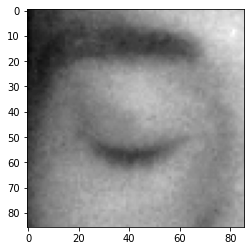

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png"),cmap="gray")

In [6]:
a=plt.imread('/content/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png')
a.shape

(86, 86)

In [7]:
datadir='/content/train'
img_width=84
img_height=84
batch_size=32

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
datagen = ImageDataGenerator(rescale=1./ 255, zoom_range=0.2, horizontal_flip=True,rotation_range=30)

data_generator = datagen.flow_from_directory(
    datadir,target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 4000 images belonging to 2 classes.


In [10]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./ 255, rotation_range=30, zoom_range=0.2, horizontal_flip=True,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    datadir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode="grayscale",
    subset='training') # my training data

Found 3200 images belonging to 2 classes.


In [11]:
validation_generator = train_datagen.flow_from_directory(
    datadir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode="grayscale",
    subset='validation') #my validation data

Found 800 images belonging to 2 classes.


In [12]:
input_shape=(img_width,img_height,1)

nb_train_samples=3200
nb_test_samples=800

#Building Model

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(input_shape)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 82, 82, 256)       2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy',patience=5)

#Model Training

In [16]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                          epochs=30,validation_data=validation_generator,
                          validation_steps=len(validation_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 39s 58ms/step - loss: 0.5312 - accuracy: 0.6741 - val_loss: 0.2923 - val_accuracy: 0.9350
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.1582 - accuracy: 0.9381 - val_loss: 0.2160 - val_accuracy: 0.9500
Epoch 3/30
100/100 [==============================] - 5s 53ms/step - loss: 0.0779 - accuracy: 0.9750 - val_loss: 0.1686 - val_accuracy: 0.9600
Epoch 4/30
100/100 [==============================] - 5s 53ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.2369 - val_accuracy: 0.9450
Epoch 5/30
100/100 [==============================] - 5s 53ms/step - loss: 0.0846 - accuracy: 0.9760 - val_loss: 0.3889 - val_accuracy: 0.9413
Epoch 6/30
100/100 [==============================] - 5s 53ms/step - loss: 0.0514 - accuracy: 0.9826 - val_loss: 0.2507 - val_accuracy: 0.9550
Epoch 7/30
100/100 [==============================] - 5s 54ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.1091 - val_accuracy: 0.973

#Model Evaluation

In [18]:
score= model.evaluate_generator(validation_generator)
print("Accuracy = ",score[1]*100,'%')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy =  97.00000286102295 %


#Plotting Training Information

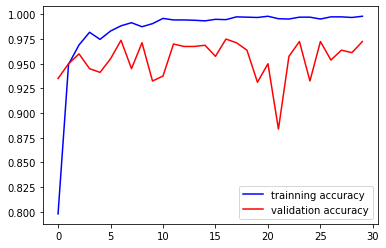

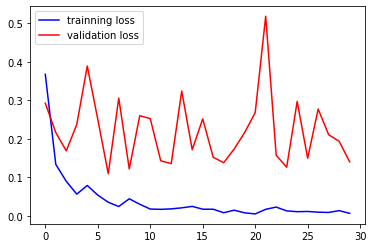

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

#Model Testing

In [20]:
print(train_generator.class_indices)

{'Closed_Eyes': 0, 'Open_Eyes': 1}


In [31]:
def testing(a):
  img = cv2.resize(a, (84,84))
  img1 = img.reshape(-1,84,84,1)
  result=model.predict(img1)
  #print(result)
  if result[0][0]>0.5:
    prediction='Drowsiness'
  else:
    prediction='No Drowsiness'
  print(prediction)

In [32]:
img=plt.imread("/content/train/Open_Eyes/s0001_02376_0_0_1_0_0_01.png") #took a closed eye image
testing(img)

Drowsiness


In [33]:
img=plt.imread("/content/train/Closed_Eyes/s0001_00441_0_0_0_0_1_01.png")  #took an open eye image
testing(img)

No Drowsiness
